<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

<font color='red'>
Ilanit Berditchevski, 322453200   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (35%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [55]:
import matplotlib.pyplot as plt
import numpy as np

### **2. Data**

### **2.1 Convex Data**

Generate a convex 2D dataset

In [56]:
## Generate 2D data
X_convex = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X_convex)

print(X_convex.shape)


(2000, 2)


Plot the a convex 2D dataset to explore how many clusters it contains

<ipython-input-57-ccfde5bef7a5>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_convex[:, 0], X_convex[:, 1], cmap='viridis')


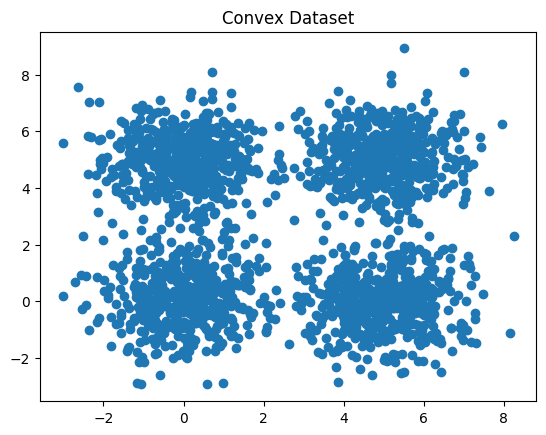

In [57]:
plt.title("Convex Dataset")
plt.scatter(X_convex[:, 0], X_convex[:, 1], cmap='viridis')

### **2.2 Non-Convex Data**

Generate a non-convex 2D dataset

In [58]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X_non_convex, y = make_moons(n_samples=300, noise=0.05, random_state=42)


Plot the non convex 2D dataset to explore how many clusters it contains

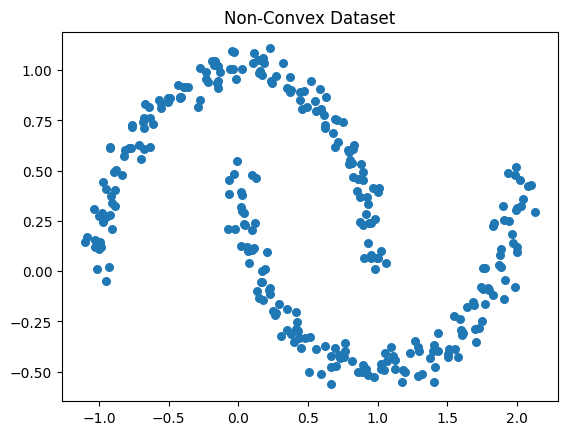

In [59]:
plt.scatter(X_non_convex[:, 0], X_non_convex[:, 1], s=30)
plt.title("Non-Convex Dataset")
plt.show()

### **3. K-Means**

Implement the algorithm

In [60]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X.copy()

        # Initialize centroids randomly by selecting n_clusters random points from X
        np.random.seed(42)  # For reproducibility
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices].copy()

        # Initialize lists
        self.labels_history = []
        self.centroids_history = []
        self.costs = []

        # K-means iterations
        for iteration in range(self.max_iter):
            # Store current centroids
            self.centroids_history.append(self.centroids.copy())

            # Assign points to closest centroids
            self.labels_ = self._get_labels(X)

            # Store current labels
            self.labels_history.append(self.labels_.copy())

            # Calculate and store cost
            cost = self._calculate_cost(X)
            self.costs.append(cost)

            # Update centroids
            new_centroids = self._get_centroids(X, self.labels_)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        pass

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("Model must be fitted before making predictions")

        # Handle single point prediction
        if X.ndim == 1:
            X = X.reshape(1, -1)

        return self._get_labels(X)

    def _get_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i, centroid in enumerate(self.centroids):
            # Calculate distance from all points to this centroid
            distances[:, i] = np.sqrt(np.sum((X - centroid) ** 2, axis=1))

        return distances

    def _get_labels(self, X):
        distances = self._get_distances(X)

        # Assign each point to the closest centroid
        labels = np.argmin(distances, axis=1)

        return labels

    def _get_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))

        for k in range(self.n_clusters):
            # Find all points assigned to cluster k
            cluster_points = X[labels == k]

            if len(cluster_points) > 0:
                # Calculate mean of points in this cluster
                centroids[k] = np.mean(cluster_points, axis=0)
            else:
                # If no points assigned to this cluster, keep the old centroid
                centroids[k] = self.centroids[k]

        return centroids

    def _calculate_cost(self, X):
        cost = 0

        for k in range(self.n_clusters):
            # Find all points assigned to cluster k
            cluster_points = X[self.labels_ == k]

            if len(cluster_points) > 0:
                # Calculate sum of squared distances to centroid
                centroid = self.centroids[k]
                cost += np.sum((cluster_points - centroid) ** 2)

        return cost

### **3.1 K-Means Using Convex Data**

Run the algorithm on the 2D convex dataset

In [61]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_convex)

Plot a graph of the costs as a function of the iterations

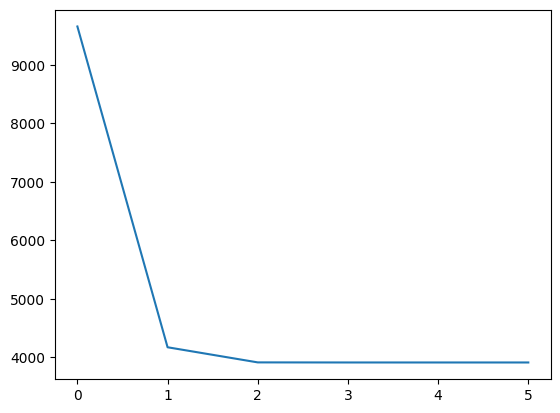

In [62]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: <br>
3 clusters: <br>
4 clusters: <br>
6 clusters: <br>
8 clusters: <br>
10 clusters: <br>
20 clusters: <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

<ipython-input-63-9d94c2863ff2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids[k, 0], centroids[k, 1],


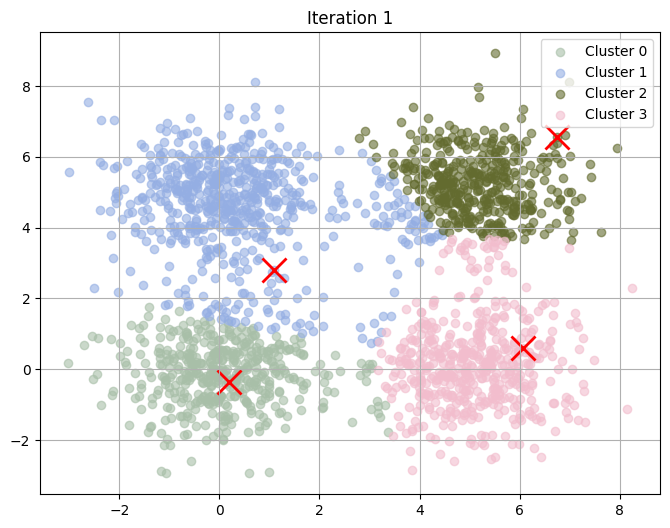

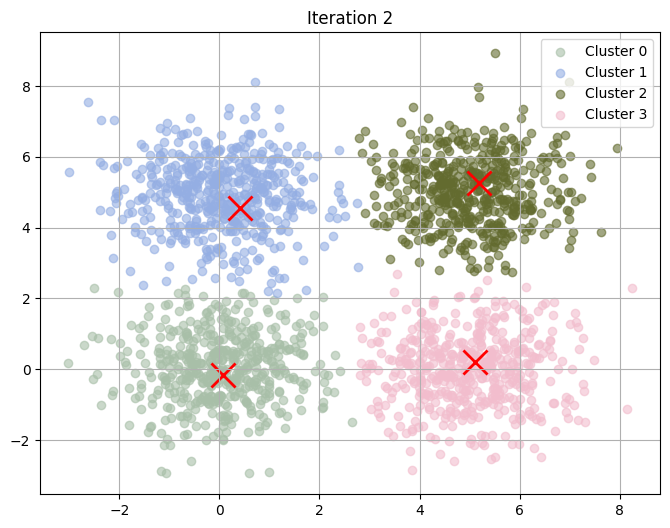

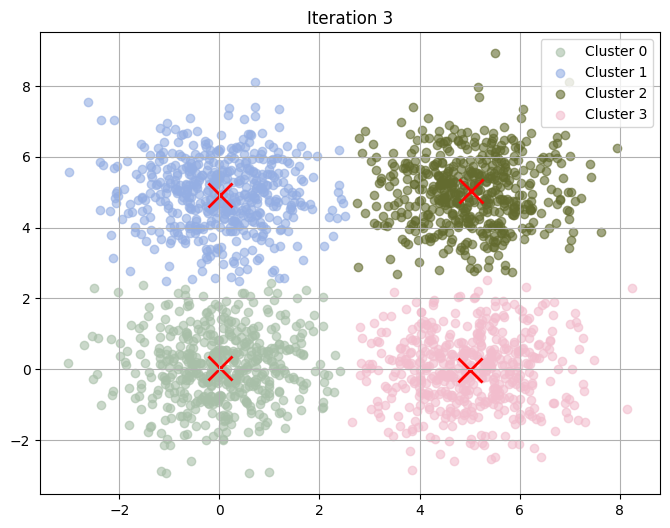

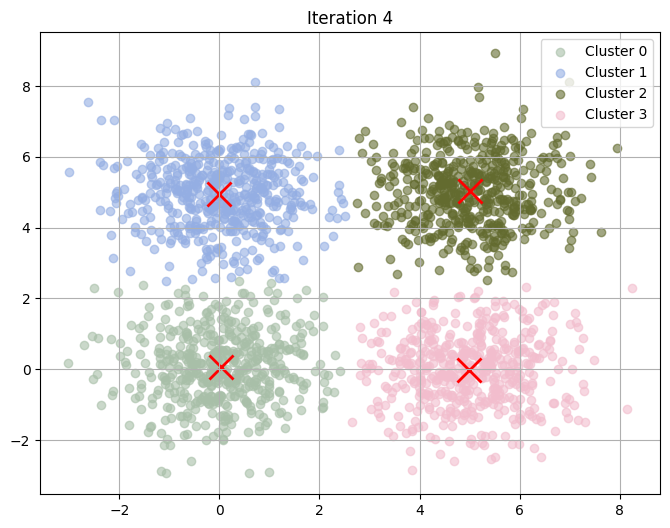

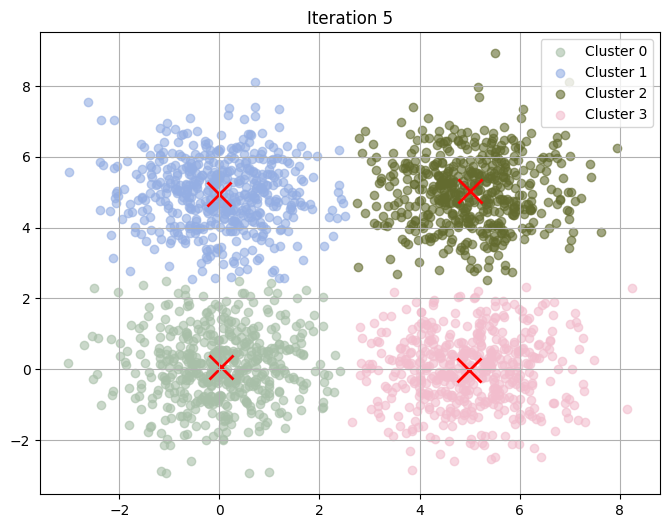

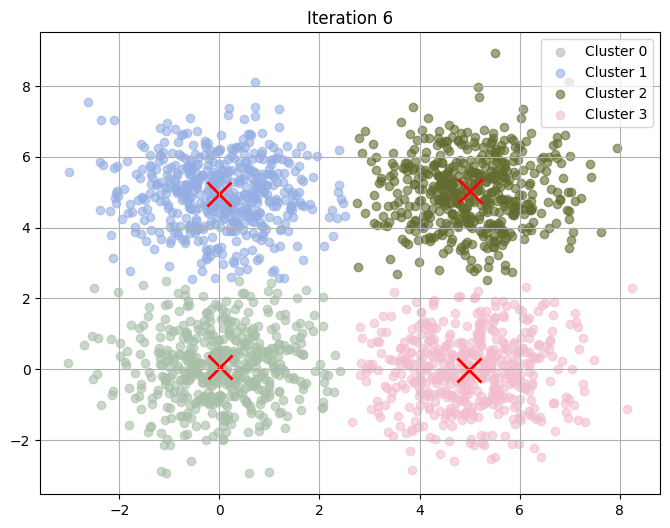

In [63]:
def plot_kmeans_iterations(kmeans):
    import matplotlib.pyplot as plt

    # Custom colors provided by you
    custom_colors = ['#A8BFA8', '#94AEE3', '#636B2F', '#F2BDCD']

    num_iterations = len(kmeans.centroids_history)
    X = kmeans.X_fit_

    for i in range(num_iterations):
        plt.figure(figsize=(8, 6))
        centroids = kmeans.centroids_history[i]
        labels = kmeans.labels_history[i]

        for k in range(kmeans.n_clusters):
            cluster_points = X[labels == k]
            color = custom_colors[k % len(custom_colors)]

            # Plot cluster points
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                        color=color, label=f'Cluster {k}', alpha=0.6)

            # Plot centroid in the same color
            plt.scatter(centroids[k, 0], centroids[k, 1],
                        s=300, color='red', marker='x', edgecolor='black', linewidths=2)

        plt.title(f'Iteration {i + 1}')
        plt.legend()
        plt.grid(True)
        plt.show()


# Call the function with your kmeans instance
plot_kmeans_iterations(kmeans)

### **3.1 K-Means Using Non-Convex Data**

Run the algorithm on the 2D non-convex dataset

In [64]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_non_convex)

Plot a graph of the costs as a function of the iterations

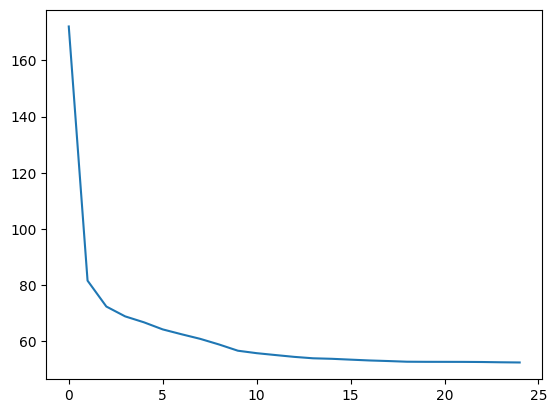

In [65]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: <br>
3 clusters: <br>
4 clusters: <br>
6 clusters: <br>
8 clusters: <br>
10 clusters: <br>
20 clusters: <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def plot_kmeans_iterations(kmeans):
    """Plot clusters and centroids for each iteration"""
    # Custom colors provided by you
    custom_colors = ['#A8BFA8', '#94AEE3', '#636B2F', '#F2BDCD', '#BA867B', '#A8BFA8', '#6C284D', '#F0E68C']

    num_iterations = len(kmeans.centroids_history)
    X = kmeans.X_fit_

    for i in range(num_iterations):
        plt.figure(figsize=(8, 6))
        centroids = kmeans.centroids_history[i]
        labels = kmeans.labels_history[i]

        for k in range(kmeans.n_clusters):
            cluster_points = X[labels == k]
            color = custom_colors[k % len(custom_colors)]

            # Plot cluster points
            if len(cluster_points) > 0:
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                            color=color, label=f'Cluster {k}', alpha=0.6)

            # Plot centroid in the same color
            plt.scatter(centroids[k, 0], centroids[k, 1],
                        s=300, color='red', marker='x', edgecolor='black', linewidths=2)

        plt.title(f'Iteration {i + 1} - {kmeans.n_clusters} Clusters')
        plt.legend()
        plt.grid(True)
        plt.show()

def run_kmeans_experiments(X_data, cluster_numbers=[2, 3, 4, 6, 8, 10, 20]):
    """Run K-means with different numbers of clusters and return final costs"""
    results = {}

    print("Running K-means experiments with different cluster numbers:")
    print("=" * 60)

    for n_clusters in cluster_numbers:
        print(f"\nRunning K-means with {n_clusters} clusters...")

        # Initialize and fit K-means
        kmeans = KMeans(n_clusters=n_clusters, max_iter=300)
        kmeans.fit(X_data)

        # Get final cost
        final_cost = kmeans.costs[-1] if kmeans.costs else 0
        results[n_clusters] = final_cost

        print(f"Final cost for {n_clusters} clusters: {final_cost:.4f}")

        # Plot the final clustering result
        plt.figure(figsize=(10, 8))

        # Custom colors for visualization
        custom_colors = ['#A8BFA8', '#94AEE3', '#636B2F', '#F2BDCD', '#BA867B',
                        '#A8BFA8', '#6C284D', '#F0E68C', '#87CEEB', '#FFA07A',
                        '#20B2AA', '#778899', '#B0C4DE', '#FFFFE0', '#00CED1',
                        '#FF6347', '#40E0D0', '#EE82EE', '#90EE90', '#FFB347']

        # Plot each cluster
        for k in range(n_clusters):
            cluster_points = X_data[kmeans.labels_ == k]
            color = custom_colors[k % len(custom_colors)]

            if len(cluster_points) > 0:
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                           color=color, label=f'Cluster {k}', alpha=0.7, s=50)

        # Plot centroids
        for k in range(n_clusters):
            plt.scatter(kmeans.centroids[k, 0], kmeans.centroids[k, 1],
                       s=300, color='red', marker='x', edgecolor='black', linewidths=3)

        plt.title(f'Final K-means Clustering - {n_clusters} Clusters\nFinal Cost: {final_cost:.4f}')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Plot cost evolution
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, len(kmeans.costs) + 1), kmeans.costs, 'b-o', linewidth=2, markersize=6)
        plt.title(f'Cost Evolution - {n_clusters} Clusters')
        plt.xlabel('Iteration')
        plt.ylabel('Cost (WCSS)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    # Summary of results
    print("\n" + "=" * 60)
    print("SUMMARY OF RESULTS:")
    print("=" * 60)
    for n_clusters in cluster_numbers:
        print(f"{n_clusters} clusters: {results[n_clusters]:.4f}")

    return results

def plot_elbow_method(results):
    """Plot the elbow method to help determine optimal number of clusters"""
    cluster_numbers = list(results.keys())
    costs = list(results.values())

    plt.figure(figsize=(10, 6))
    plt.plot(cluster_numbers, costs, 'bo-', linewidth=2, markersize=8)
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Final Cost (WCSS)')
    plt.grid(True, alpha=0.3)
    plt.xticks(cluster_numbers)

    # Annotate each point with the cost value
    for i, (k, cost) in enumerate(zip(cluster_numbers, costs)):
        plt.annotate(f'{cost:.1f}', (k, cost), textcoords="offset points",
                    xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.show()


results = run_kmeans_experiments(X_convex)  # or X_non_convex
plot_elbow_method(results)

# If you want to see iterations for a specific number of clusters:
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(X_convex)  # or X_non_convex
# plot_kmeans_iterations(kmeans)


Output hidden; open in https://colab.research.google.com to view.

Explain the output of k-means for both datasets. Focus on when k-means successfully classifies the dataset and when it fails. Provide an explanation for why this happens.

### *** Explanation for K-means Clustering Performance: ***
In the convex dataset, K-means performs very well when the number of clusters k matches the true underlying structure:
- For k=4:
The clustering captures all four distinct, well-separated, and roughly spherical clusters. The final centroids are correctly placed, and the cost is minimized significantly. The algorithm converges quickly, as shown in the "Cost Evolution" plot.

- For k=3:
The algorithm still performs fine, grouping nearby clusters into larger clusters. The centroids are stable, and cost is reduced, but there is under-clustering.

- For k=2:
K-means fails to correctly separate all four clusters and instead splits them into two vertical groups. This merges natural clusters and increases the variance. Still, the algorithm behaves as expected based on its distance-based logic.

- For k=6,8
We see over-clustering, where K-means splits some natural clusters into subgroups. While the cost keeps decreasing, interpretability drops. The algorithm is technically performing correctly but semantically overfitting.

Reasons for success: The data is symmetric, convex, and isotropic. K-means optimizes Euclidean distance, which is well-suited for spherical clusters.The algorithm creates linear boundaries , which match the geometric structure of the data.

K-means fails because:
No matter what k is chosen, K-means can not handle curved or elongated shapes. It struggles with nested structures and misplaces centroids due to its convex assumption.




## Part 2 - PCA (35%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [67]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [68]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [69]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
      X_centered = X - (np.mean(X,axis = 0))
      COVX = np.cov(X_centered, rowvar=False)
      eigenvalues, eigenvectors = np.linalg.eigh(COVX)
      eigenvalues_sorted = np.argsort(eigenvalues)[::-1]
      self.V = eigenvectors[:, eigenvalues_sorted]
    def transform(self, X, n_dimentions):
        X_reduced = np.dot(X, self.V[:, : n_dimentions])
        return X_reduced



Run the algorithm on MNIST dataset.

In [70]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

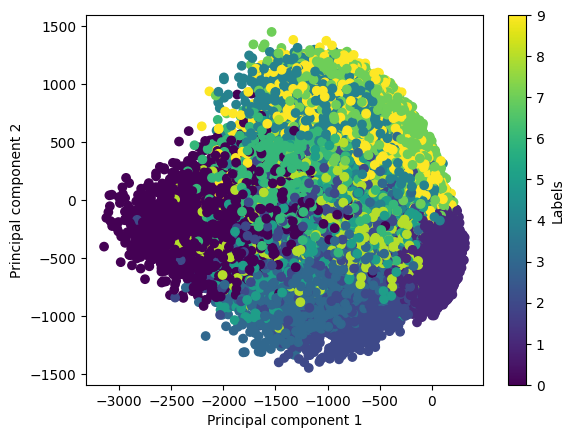

In [71]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

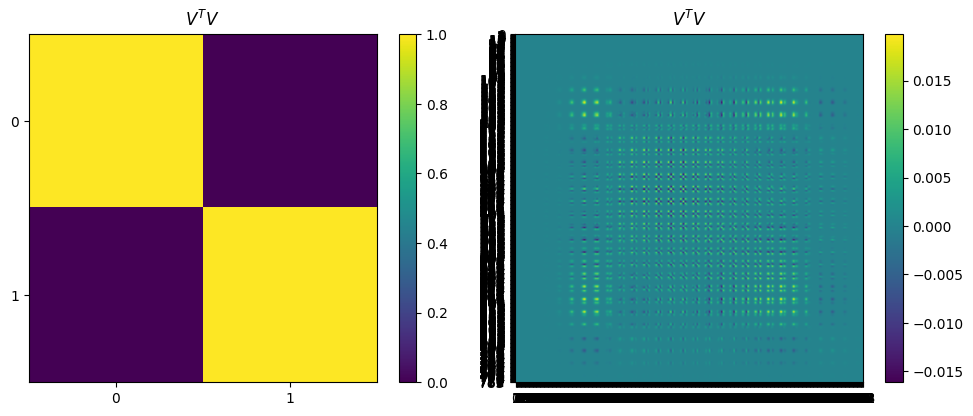

In [72]:
V = pca.V[:, : 2]
VTV = np.dot(V.T, V)
VVT = np.dot(V, V.T)
d = pca.V.shape[0]
r = 2

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(VTV, cmap='viridis')
plt.title('$V^TV$')
plt.colorbar()
plt.xticks(np.arange(r))
plt.yticks(np.arange(r))

plt.subplot(1, 2, 2)
plt.imshow(VVT, cmap='viridis')
plt.title('$V^TV$')
plt.colorbar()
plt.xticks(np.arange(d))
plt.yticks(np.arange(d))

plt.tight_layout()
plt.show()


Your Explanation:

$VV^T$ matrix is the product of V and its transpose. It represents the projection matrix onto the space spanned by the eigenvectors in V, $VV^T$ is not necessarily diagonal but symmetric, with its rank being r and the rest of the elements being zeros. The size of $VV^T$ is d*d.

That's why we can observe that $VV^T$ has more cells. Because d>=r the eigenvalues may not complete a base.

In this case d>r => $VV^T$ != 𝚰.

$V^TV$ relies on the orthonormality of V $VV^T$ secribes the sbspace of span(V)

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [73]:
def pca_reconstruction(x, n_dimentions):
    encoded = np.dot(pca.V[:, : n_dimentions].T,x)
    x_reconstructed = np.dot(pca.V[:, : n_dimentions], encoded)
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


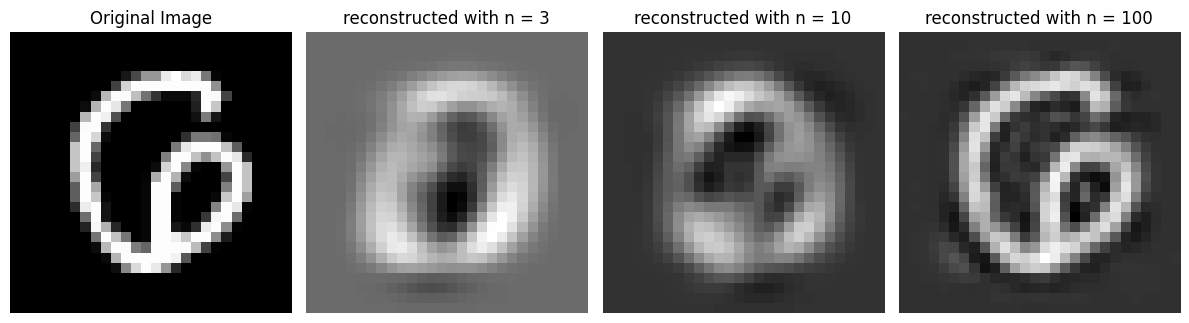

In [74]:
sample_image = X[np.random.choice(X.shape[0])]
dimensions = [3, 10, 100]
reconstructed_images = [pca_reconstruction(sample_image, n) for n in dimensions]

# Plotting the original and reconstructed images
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, n in enumerate(dimensions):
    plt.subplot(1, 4, i + 2)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'reconstructed with n = {n}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Part 3 - Convolutional Neural Networks (30%)

This part is related to the NN implementation from HW4, so pay attention.
In this section, we are going to implement a convolutional neural network (CNN) and train it on the mnist dataset. It will be very similar to what you did in the previous sections but now we use new layers like ```convolution```and ```pooling```.  
To get started, copy all parts from Ex4 into this section.

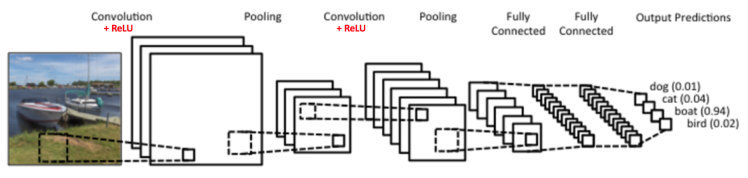

Reminder:  
Go over this **[article](https://cs231n.github.io/convolutional-networks/)** to better understand convolutional neural networks.

- **Convolutional operation:** A “filter”, also called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed.

- **Pooling:** “Pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image. By sliding the window along the image, we compute the mean or the max of the portion of the image inside the window in case of MeanPooling or MaxPooling.

- **Stride:** The number of pixels to pass at a time when sliding the convolutional kernel.

- **Padding:** To preserve exactly the size of the input image, it is useful to add zero padding on the border of the image.

**How do we compute the output size of a convolutional layer?**

input:
- An image of dimensions $W_{in}×H_{in}$.
- A filter of dimensions $K \times K$.
- Stride $S$
- padding $P$

$$W_{out} = \left\lfloor\frac{W_{in} - F + 2P}{S}\right\rfloor + 1$$
<br>
$$H_{out} = \left\lfloor\frac{H_{in} - F + 2P}{S}\right\rfloor + 1$$

**Q1:** Given an image with shape [1,28,28], what will be the shape of the output of a convolution layer with 10 5x5 kernels (filters), with stride of 1, and without padding?

**A1:**
<font color='red'>

Apply the formula:

$$
W_{out} = \left\lfloor\frac{W_{in} - F + 2P}{S}\right\rfloor + 1
$$

Substitute values:

$$
W_{out} = \left\lfloor\frac{28 - 5 + 0}{1}\right\rfloor + 1 = 24
$$

**Output shape:** `[10, 24, 24]`  

There are 10 filters, therofore depth becomes 10.

</font>

**Q2:** We would like our convolution layer to output a volume with the same shape as the input image. So input_shape and output_shape will be [1,28,28]. What should be the padding (assume 5x5 filter and stride of 1)?

**A2:**

We solve for padding $P$:

$$
28 = \left\lfloor\frac{28 - 5 + 2P}{1}\right\rfloor + 1
$$

$$
27 = 23 + 2P \Rightarrow P = 2
$$


**Q3:** Consider an input image with shape [1, 28, 28]. You apply two consecutive convolution layers. The first convolution layer uses 20 filters, each of size 3x3, with a stride of 1 and no padding. The second convolution layer uses 15 filters, each of size 3x3, with a stride of 3 and padding of 2. What will be the shape of the output after these two convolution layers?

**A3:**
---

**Layer 1:**
- 20 filters of size $3 \times 3$
- Stride $S = 1$
- Padding $P = 0$

$$
W_{out} = \left\lfloor\frac{28 - 3 + 0}{1}\right\rfloor + 1 = 26
$$

**Output after Layer 1:** `[20, 26, 26]`

---

**Layer 2:**
- 15 filters of size $3 \times 3$
- Stride $S = 3$
- Padding $P = 2`

Apply the formula:

$$
W_{out} = \left\lfloor\frac{26 - 3 + 2 \cdot 2}{3}\right\rfloor + 1 = \left\lfloor\frac{27}{3}\right\rfloor + 1 = 9 + 1 = 10
$$

**Final output shape:** `[15, 10, 10]`


In [75]:
# Here are the parts from the last assignment which are required for the code

def train_model(model, optimizer, criterion,
                nepochs, train_loader, val_loader, is_image_input = False):
  '''
  Train a pytorch model and evaluate it every epoch.
  Params:
  model - a pytorch model to train
  optimizer - an optimizer
  criterion - the criterion (loss function)
  nepochs - number of training epochs
  train_loader - dataloader for the trainset
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                Should be True for Neural Networks
                                but False for Convolutional Neural Networks.
  '''
  train_losses, val_losses = [], []
  for e in range(nepochs):
      running_loss = 0
      running_val_loss = 0
      for images, labels in train_loader:
          if is_image_input:
            # Flatten Fashion-MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

          # Training pass
          model.train() # set model in train mode

          # TODO: Compute the loss and do the backward and optimizer step
          ######################
          optimizer.zero_grad()
          outp = model(images) # forward pass
          loss = criterion(outp, labels) # loss
          loss.backward() # backward pass
          optimizer.step() # update weights
          ######################

          running_loss += loss.item()
      else:
          val_loss = 0
          # 6.2 Evalaute model on validation at the end of each epoch.
          with torch.no_grad():
              for images, labels in val_loader:
                  if is_image_input:
                    # Flatten Fashion-MNIST images into a 784 long vector
                    images = images.view(images.shape[0], -1)
                  model.eval() # set model in evaluation mode

                  # TODO: compute the Validation Loss
                  ######################
                  ### YOUR CODE HERE ###
                  ######################
                  # val_loss = ...
                  outp = model(images)
                  val_loss = criterion(outp,labels)
                  ######################

                  running_val_loss += val_loss.item()

          # 7. track train loss and validation loss
          train_losses.append(running_loss/len(train_loader))
          val_losses.append(running_val_loss/len(val_loader))

          print("Epoch: {}/{}.. ".format(e+1, nepochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))
  return train_losses, val_losses


In [83]:
import torch
from torch import nn, optim
from torch.utils import data
import torchvision
from torchvision import datasets, transforms
import torch.nn.functional as F

data_path = "./FashionMNIST_data"
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

mnist_data = datasets.FashionMNIST(data_path, download=True, train=True, transform=transform)

train_size = int(0.8 * len(mnist_data))
val_size = len(mnist_data) - train_size

trainset, valset = torch.utils.data.random_split(mnist_data ,[train_size, val_size])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64 , shuffle=True)


val_loader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)

In [86]:
def evaluate_model(model, val_loader, is_image_input=False):
  '''
  Evaluate a model on the given dataloader.
  Params:
  model - a pytorch model to train
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                   Should be True for Neural Networks
                                   but False for Convolutional Neural Networks.
  '''
  validation_accuracy = 0
  with torch.no_grad():
      model.eval()
      for images, labels in val_loader:
          if is_image_input:
            # flatten Fashion-MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
          # forward pass
          test_output = model(images)
          ps = torch.exp(test_output)
          top_p, top_class = ps.topk(1, dim=1)
          # count correct predictions
          equals = top_class == labels.view(*top_class.shape)
          validation_accuracy += torch.sum(equals.type(torch.FloatTensor))
  res = validation_accuracy/len(val_loader.dataset)
  return res

Let's create a simple Convolutional neural network.
The architecture:  
**Conv layer** (10 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Conv layer** (20 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Hidden layer** (320 units) -> **Relu** -> **Hidden layer** (50 units) -> **Output layer** (10 outputs).

In [84]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = F.max_pool2d(x, 2) # max pooling 1
        x = F.relu(x) # relu
        x = self.conv2(x) # conv 2
        x = F.max_pool2d((x), 2) # max pooling 2
        x = F.relu(x) # relu
        x = x.view(-1, 320) # flatten input
        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.fc2(x) # hidden layer 2
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
print(cnn_model)

ConvolutionalNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


We can now train the model on the train set.

In [81]:
# set hyperparameters
cnn_nepochs = 3
cnn_learning_rate = 0.03

In [85]:

# train the conv model
cnn_model = ConvolutionalNet()
# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

Epoch: 1/3..  Training Loss: 0.867..  Validation Loss: 0.610.. 
Epoch: 2/3..  Training Loss: 0.530..  Validation Loss: 0.493.. 
Epoch: 3/3..  Training Loss: 0.451..  Validation Loss: 0.434.. 


In [87]:
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy: 0.8390833139419556


You should probably see that our CNN performs better on the validation set compared to the simple neural network (within 3 epochs only!) :)

___________

Now it's your turn: Use the code above and create a convolutional neural network that achieves the best accuracy on the validation set.
Note that you must use only the Fashion-MNIST training set as we did earlier:
```mnist_data = datasets.FashionMNIST(data_path, download=True, train=True, transform=transform)```

**Using any other or additional data from the test set will result in point deductions (without any bonus)!**

You should consider changing (change at least 4 things):  
1. Network architecture:
  - Number of convolutional layers
  - Number of kernels (filters) for each convolutional layer
  - Size of each kernel on each layer
  - Number of hidden layers (fully connected)
  - Number of units for each hidden layer
  - Usage of layers like BatchNormalization and Dropout.
  - Usage of max pooling (or maybe other pooling strategies)

2. Training hyperparameters:
  - Learning rate
  - Optimizer (SGD with momentum, adam, etc)
  - Number of epochs

To get full points in this part: make sure you implement the model architecture correctly, train the model properly, use the optimizer effectively, and ensure your validation accuracy is greater than 80%. **(4 points for this part)**

In [88]:
## TODO: Prepocess
######################
### YOUR CODE HERE ###
######################
data_path = "./FashionMNIST_data_CNN"

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

# Download and load the data
mnist_data = datasets.FashionMNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

# split trainset into train (80%) and validation (20%)
train_size = int(0.8 * len(mnist_data))
val_size = len(mnist_data) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(mnist_data, [train_size, val_size])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.07MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 42.9MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.38MB/s]


In [89]:
# TODO: Find network and hyperparams that achieve best validation accuracy as possible
input_layer = 784
n_filters1 = 32
F1 = 3
n_filters2 = 64
F2 = 3
n_filters3 = 128
F3 = 3
output_layer = 10
learning_rate = 0.0005
epochs = 6

In [91]:
class bestModelNet(nn.Module):
    def __init__(self, n_filters1, n_filters2, n_filters3, F1, F2, F3):
        super(bestModelNet, self).__init__()
        self.conv1 = nn.Conv2d(1, n_filters1, kernel_size=F1, padding=1)
        self.bn1 = nn.BatchNorm2d(n_filters1)
        self.conv2 = nn.Conv2d(n_filters1, n_filters2, kernel_size=F2, padding=1)
        self.bn2 = nn.BatchNorm2d(n_filters2)
        self.conv3 = nn.Conv2d(n_filters2, n_filters3, kernel_size=F3, padding=1)
        self.bn3 = nn.BatchNorm2d(n_filters3)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(n_filters3 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)

        x = x.view(-1, n_filters3 * 3 * 3)
        x = self.dropout(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [92]:
# TODO: Save the best model in this variable and evaluate on the validation set
######################
### YOUR CODE HERE ###
######################
best_model = bestModelNet( n_filters1 = n_filters1, n_filters2 = n_filters2, n_filters3 = n_filters3,F1 = F1, F2 = F2, F3 = F3 )
best_model_optimizer = optim.Adam(best_model.parameters(), lr=learning_rate)
best_model_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(best_model, best_model_optimizer, best_model_criterion,
                                       epochs, train_loader, val_loader, is_image_input=False)
print(f"Validation accuracy: {evaluate_model(best_model, val_loader, is_image_input=False)}")


Epoch: 1/6..  Training Loss: 0.561..  Validation Loss: 0.345.. 
Epoch: 2/6..  Training Loss: 0.358..  Validation Loss: 0.267.. 
Epoch: 3/6..  Training Loss: 0.315..  Validation Loss: 0.271.. 
Epoch: 4/6..  Training Loss: 0.283..  Validation Loss: 0.257.. 
Epoch: 5/6..  Training Loss: 0.265..  Validation Loss: 0.226.. 
Epoch: 6/6..  Training Loss: 0.248..  Validation Loss: 0.229.. 
Validation accuracy: 0.9160000085830688


When you are satisfied with your model performance on the validation set, load the test set given to you (**important** - apply any transformation you applied to the train set before) - [FashionMNIST_test.pth](https://drive.google.com/file/d/1FeOaoRU-tkhOiKzsK_UZNwbNPaRqaDVu/view?usp=sharing), into your drive assignment folder (e.g "machine_learning/assignments/assignment5/FashionMNIST_test.pth"), and write the model predictions for each test sample to a file called "predictions.txt". You can use the code below.


**Download the "predictions.txt" file to your computer, and then upload it to the "submit" system with this notebook in one zip file named ex4.zip**

Ensure each prediction is printed in a new line.

For Example ("predictions.txt"):
```
0  
5  
9
```

<font color='blue'><b>
Note: Bonus points will be given for the top 10 submissions having the highest test accuracy:
- Top 1-3 get 5 points
- Top 4-6 get 3 points
- top 7-10 get 2 points  
</b></font>  

In [97]:
def predict_and_save(model, test_path, file_name):
  # load mnist test data
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))

  ## TODO: Prepocess the test set (i.e apply the transform to normalize the test set as you did to your train set)
  ######################
  ### YOUR CODE HERE ###
  ######################

  # create a dataloader
  mnist_test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=1, shuffle=False)
  # make a prediction for each batch and save all predictions in total_preds
  total_preds = torch.empty(0, dtype=torch.long)
  for imgs in mnist_test_loader:
    log_ps = model(imgs[0])
    ps = torch.exp(log_ps)
    _, top_class = ps.topk(1, dim=1)
    total_preds = torch.cat((total_preds, top_class.reshape(-1)))
  total_preds = total_preds.cpu().numpy()
  # write all predictions to a file
  with open(file_name,"w") as pred_f:
    for pred in total_preds:
      pred_f.write(str(pred) + "\n")


In [99]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
FOLDERNAME = 'machine_learning/assignments/'
ASSIGNMENTNAME = 'assignment5'

%cd drive/My\ Drive
%cp -r $FOLDERNAME/$ASSIGNMENTNAME ../../
%cd ../../

predict_and_save(best_model, test_path=f"{ASSIGNMENTNAME}/FashionMNIST_test.pth", file_name="predictions.txt")

Mounted at /content/drive
/content/drive/My Drive
/content
